# Machine Learning - Homework 3
##### Author: Shivani Tayade, Sravya Bhaskara

##### Part A:

### Bagging and Boosting on California Housing DataSet


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn


In [5]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [6]:
from sklearn.datasets import fetch_california_housing

In [7]:
#help(sklearn) 

In [8]:
from sklearn import model_selection

In [9]:
#help(sklearn.model_selection)

In [10]:
#help(sklearn.model_selection._split)

In [11]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split

In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [13]:
df = fetch_california_housing()


In [14]:
X = pd.DataFrame(df.data, columns=df.feature_names)
X.columns
X.to_csv("data")

In [15]:
Y = df.target
Y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

##### EDA

In [17]:
print(X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB
None


In [18]:
num_nans = np.isnan(Y).sum()
print(f"Number of NaN values: {num_nans}")

Number of NaN values: 0


In [19]:
nan_indices = np.where(np.isnan(Y))
print(f"Indices of NaN values: {nan_indices}")


Indices of NaN values: (array([], dtype=int64),)


In [20]:
X.isnull().sum()


MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

In [21]:
print("\nSummary Statistics:\n", X.describe())


Summary Statistics:
              MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude  
count  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704  
std       10.386050      2.135952      2.003532  
min        0.692308     32.540000   -124.350000  
25%        2.429

<Figure size 1200x800 with 0 Axes>

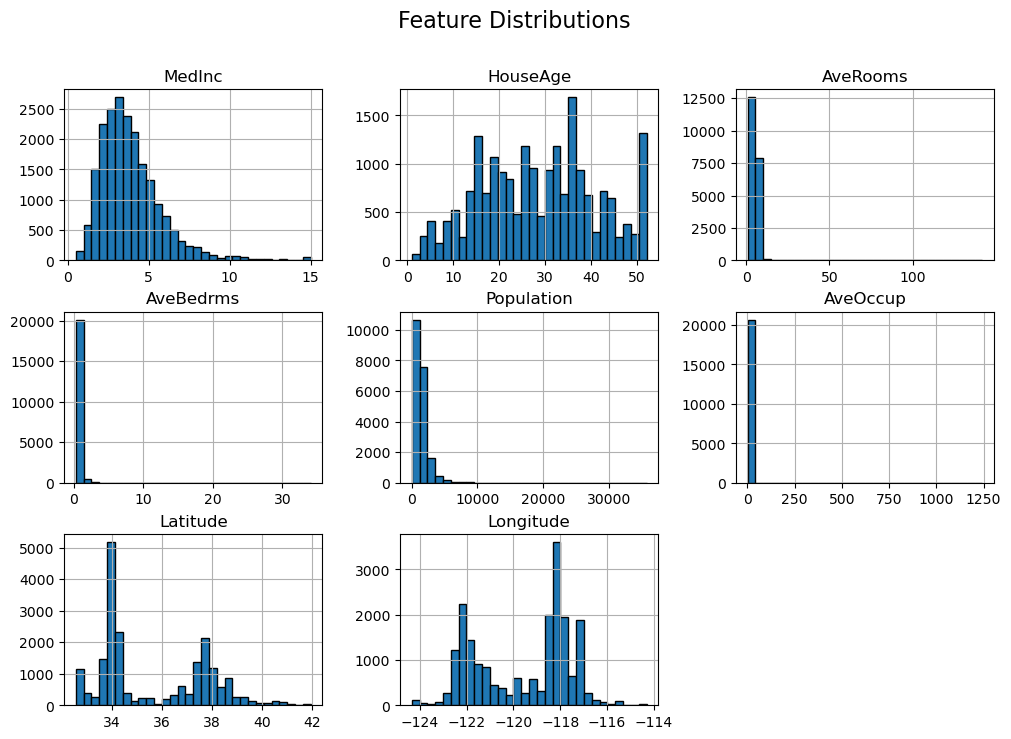

In [22]:
plt.figure(figsize=(12, 8))
X.hist(figsize=(12, 8), bins=30, edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()


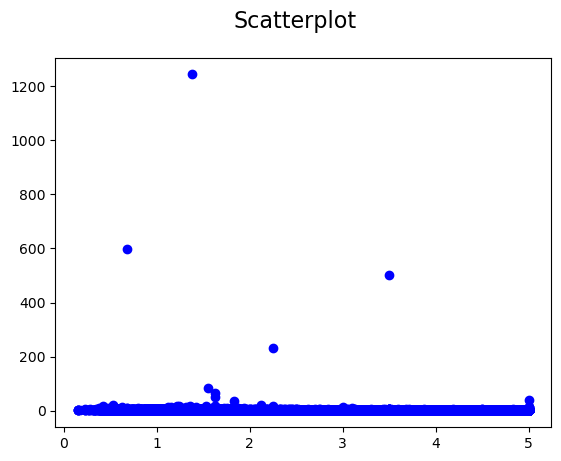

In [23]:
plt.scatter(Y, X["AveOccup"], color="blue")
plt.suptitle("Scatterplot", fontsize=16)
plt.show()

In [24]:
#sns.pairplot(X, y_vars=Y, x_vars=X.columns[:-1], height=3, aspect=1)

In [25]:
X.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000


Correlation between "avebedrms" and "AveRooms" is 0.847621, and latitude and longitude also has -0.924664 of similarity b/w them. Hence we shall try to train the model dropping one of the variable. 
The sd for avebedrms is 2.474173. Hance we will consider this variable as the spread is more.

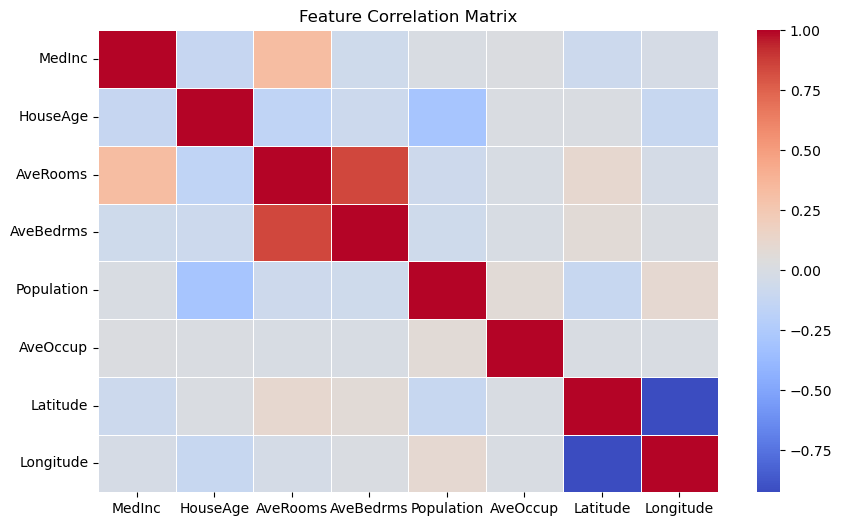

In [27]:
plt.figure(figsize=(10, 6))
sns.heatmap(X.corr(), cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()

##### Model training on overall data

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [30]:
# Initialize and train a Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

##### Default parameter

In [32]:
rf_default_params = rf.get_params()

##### Predictions

In [34]:
y_pred_rf = rf.predict(X_test)

##### Errror estimate

In [36]:
rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)


In [37]:
rf_default_params, rf_mae, rf_mse, rf_r2

({'bootstrap': True,
  'ccp_alpha': 0.0,
  'criterion': 'squared_error',
  'max_depth': None,
  'max_features': 1.0,
  'max_leaf_nodes': None,
  'max_samples': None,
  'min_impurity_decrease': 0.0,
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'min_weight_fraction_leaf': 0.0,
  'n_estimators': 100,
  'n_jobs': None,
  'oob_score': False,
  'random_state': 42,
  'verbose': 0,
  'warm_start': False},
 0.32754256845930246,
 0.2553684927247781,
 0.8051230593157366)

##### Model training on data- considering Corr()

In [39]:
X1 = X.drop(columns=["AveRooms","Longitude"])

In [40]:
X1.head()

,MedInc,HouseAge,AveBedrms,Population,AveOccup,Latitude
0,8.3252,41.0,1.023810,322.0,2.555556,37.88
1,8.3014,21.0,0.971880,2401.0,2.109842,37.86
2,7.2574,52.0,1.073446,496.0,2.802260,37.85
3,5.6431,52.0,1.073059,558.0,2.547945,37.85
4,3.8462,52.0,1.081081,565.0,2.181467,37.85


In [41]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, Y, test_size=0.2, random_state=42)

In [42]:
# Initialize and train a Random Forest Regressor
rf1 = RandomForestRegressor(n_estimators=100, random_state=42)
rf1.fit(X1_train, y1_train)

RandomForestRegressor(random_state=42)

In [43]:
rf_default_params1 = rf1.get_params()

In [44]:
y1_pred_rf = rf1.predict(X1_test)

In [45]:
rf_mae1 = mean_absolute_error(y1_test, y1_pred_rf)
rf_mse1 = mean_squared_error(y1_test, y1_pred_rf)
rf_r21 = r2_score(y1_test, y1_pred_rf)

In [46]:
rf_default_params1, rf_mae1, rf_mse1, rf_r21

({'bootstrap': True,
  'ccp_alpha': 0.0,
  'criterion': 'squared_error',
  'max_depth': None,
  'max_features': 1.0,
  'max_leaf_nodes': None,
  'max_samples': None,
  'min_impurity_decrease': 0.0,
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'min_weight_fraction_leaf': 0.0,
  'n_estimators': 100,
  'n_jobs': None,
  'oob_score': False,
  'random_state': 42,
  'verbose': 0,
  'warm_start': False},
 0.42139369590600795,
 0.37692628877253775,
 0.7123598090128124)

##### After dropping the variables the MAE, MSE has been increased to 42% and 38% compared to the 32% and 25% default parameter values. Hence, considering this we should not drop the variables.

## Given the Std dev. we need to scale the variables and then fit the model

## Formula for Robust Scaling

$$
[
X' = \frac{X - \text{median}(X)}{\text{IQR}(X)}
]
$$

$$[
{IQR} = Q_3 - Q_1
]$$


In [50]:
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler

# Initialize RobustScaler
scaler = RobustScaler()

# Apply transformation
df_scaled = X.copy()
df_scaled.iloc[:, :-1] = scaler.fit_transform(X.iloc[:, :-1])
 # View scaled data
df_scaled.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,2.197582,0.631579,1.088935,-0.267221,-0.899787,-0.307981,0.957672,-122.23
1,2.186664,-0.421053,0.626066,-0.822926,1.316631,-0.830800,0.952381,-122.22
2,1.707732,1.210526,1.898042,0.263955,-0.714286,-0.018599,0.949735,-122.24
3,0.967177,1.210526,0.364978,0.259814,-0.648188,-0.316908,0.949735,-122.25
4,0.142854,1.210526,0.653191,0.345657,-0.640725,-0.746784,0.949735,-122.25


In [51]:

print(df_scaled.describe()) 

             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  2.064000e+04  20640.000000  20640.000000  20640.000000  20640.000000   
mean   1.540799e-01     -0.018974      0.124015      0.512533      0.276628   
std    8.715378e-01      0.662398      1.535166      5.071439      1.207316   
min   -1.392252e+00     -1.473684     -2.719533     -7.656179     -1.239872   
25%   -4.456270e-01     -0.578947     -0.489191     -0.456959     -0.404051   
50%    1.018608e-16      0.000000      0.000000      0.000000      0.000000   
75%    5.543730e-01      0.421053      0.510809      0.543041      0.595949   
max    5.259674e+00      1.210526     84.806698    353.332681     36.797441   

           AveOccup      Latitude     Longitude  
count  20640.000000  20640.000000  20640.000000  
mean       0.296227      0.362926   -119.569704  
std       12.182767      0.565067      2.003532  
min       -2.493559     -0.455026   -124.350000  
25%       -0.455561     -0.087302   -1

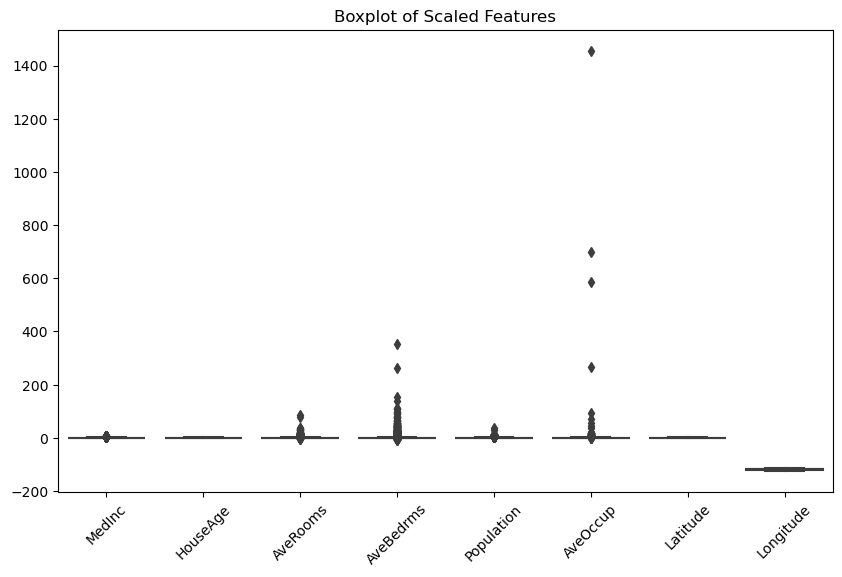

In [52]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_scaled)
plt.title("Boxplot of Scaled Features")
plt.xticks(rotation=45)
plt.show()


In [53]:
Q1 = df_scaled.quantile(0.25)
Q3 = df_scaled.quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove rows with outliers
df_scaled_no_outliers = df_scaled[~((df_scaled < lower_bound) | (df_scaled > upper_bound)).any(axis=1)]

print("Original shape:", df_scaled.shape)
print("Shape after outlier removal:", df_scaled_no_outliers.shape)


Original shape: (20640, 8)
Shape after outlier removal: (16842, 8)


In [54]:
from scipy.stats.mstats import winsorize

df_scaled = df_scaled.apply(lambda x: winsorize(x, limits=[0.05, 0.05]))  # Capping top/bottom 5%


In [55]:
from sklearn.model_selection import train_test_split

# Assuming 'Target' is the column we want to predict
X_final = df_scaled  # Adjust if needed
y_final = Y

X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_final, y_final, test_size=0.2, random_state=42)

print("Training set shape:", X_train_scaled.shape)
print("Test set shape:", X_test_scaled.shape)


Training set shape: (16512, 8)
Test set shape: (4128, 8)


In [56]:
rf_scaled = RandomForestRegressor(n_estimators=100, random_state=42)
rf_scaled.fit(X_train_scaled, y_train_scaled)

y_pred_rf_scaled = rf_scaled.predict(X_test_scaled)

# Evaluate performance
mae_scaled = mean_absolute_error(y_test_scaled, y_pred_rf_scaled)
mse_scaled = mean_squared_error(y_test_scaled, y_pred_rf_scaled)
r2_scaled = r2_score(y_test_scaled, y_pred_rf_scaled)

print(f"Random Forest - MAE: {mae_scaled:.2f}, MSE: {mse_scaled:.2f}, R²: {r2_scaled:.2f}")


Random Forest - MAE: 0.34, MSE: 0.26, R²: 0.80


# Conclusion:

#### Considering the MAE and MSE- we should consider the model with the default parameters only.

# Residual Plot (Actual vs. Predicted)

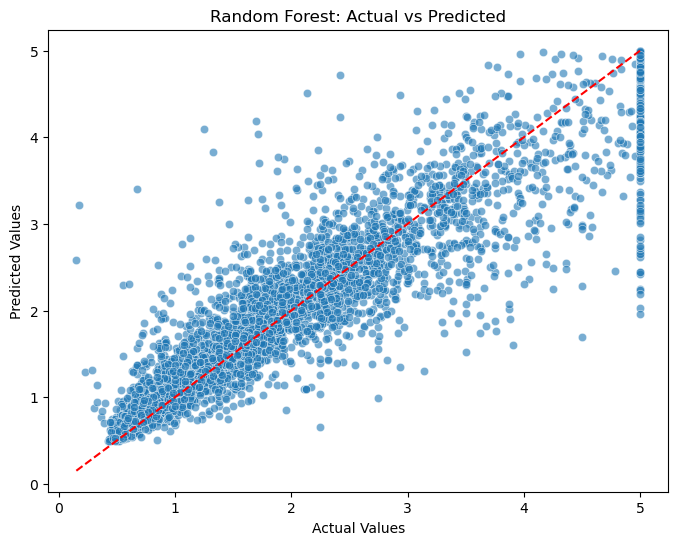

In [60]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Random Forest: Actual vs Predicted")
plt.show()


# Residual Distribution

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


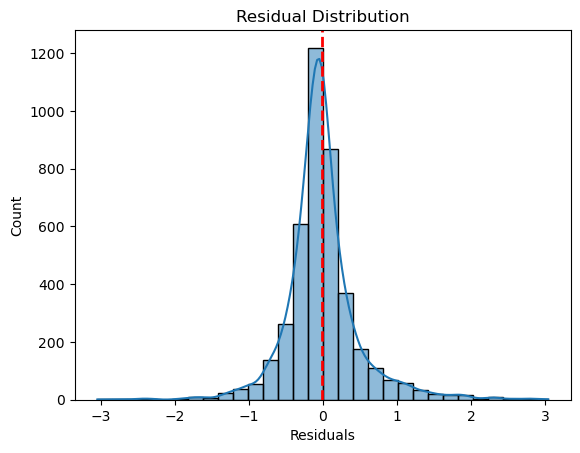

array([-0.0325   , -0.28361  ,  0.0767529, ...,  0.2417913,  0.00891  ,
       -0.13583  ])

In [62]:
residuals = y_test - y_pred_rf
sns.histplot(residuals, bins=30, kde=True)
plt.axvline(residuals.mean(), color='r', linestyle='dashed', linewidth=2)
plt.title("Residual Distribution")
plt.xlabel("Residuals")
plt.show()
residuals

# Tune the hyperparameters:

In [64]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 6, 7, 8],
    'min_samples_leaf': [5, 10, 15,20]
}

In [65]:
# Initialize model
rf = RandomForestRegressor(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)

# Fit Grid Search
grid_search.fit(X_train, y_train)

# Best parameters
print("\nBest Parameters:", grid_search.best_params_)


Fitting 3 folds for each of 48 candidates, totalling 144 fits

Best Parameters: {'max_depth': 8, 'min_samples_leaf': 5, 'n_estimators': 200}


In [66]:
# Train the final Random Forest with best parameters
best_rf = RandomForestRegressor(max_depth=8, min_samples_leaf=5, n_estimators=200, random_state=42)
best_rf.fit(X_train, y_train)

# Make predictions
y_pred_best_rf = best_rf.predict(X_test)

# Evaluate performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred_best_rf)
mse = mean_squared_error(y_test, y_pred_best_rf)
r2 = r2_score(y_test, y_pred_best_rf)

print("\nFinal Model Performance:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R² Score: {r2:.2f}")



Final Model Performance:
MAE: 0.40
MSE: 0.34
R² Score: 0.74


# Residual Plot (Actual vs. Predicted)

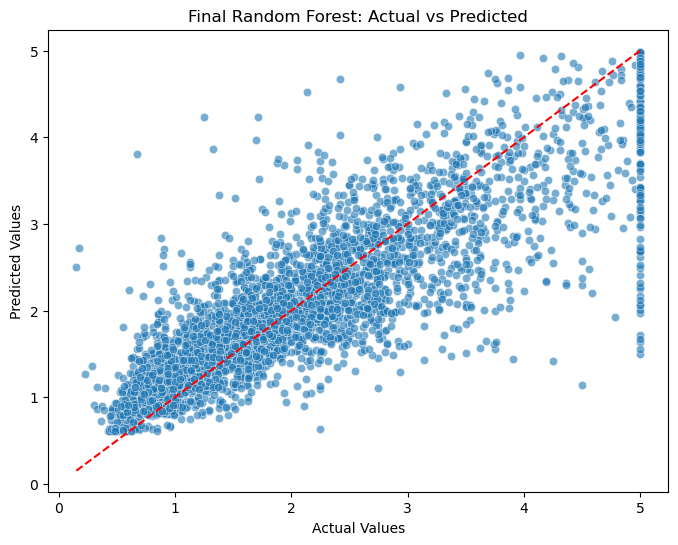

In [68]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_best_rf, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Final Random Forest: Actual vs Predicted")
plt.show()


# Residual Distribution

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


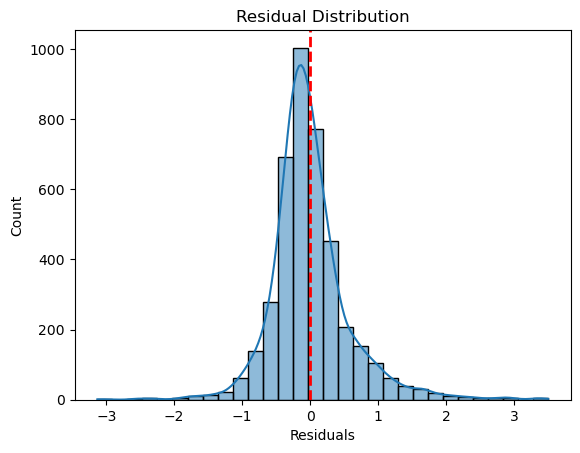

In [70]:
residuals = y_test - y_pred_best_rf
sns.histplot(residuals, bins=30, kde=True)
plt.axvline(residuals.mean(), color='r', linestyle='dashed', linewidth=2)
plt.title("Residual Distribution")
plt.xlabel("Residuals")
plt.show()


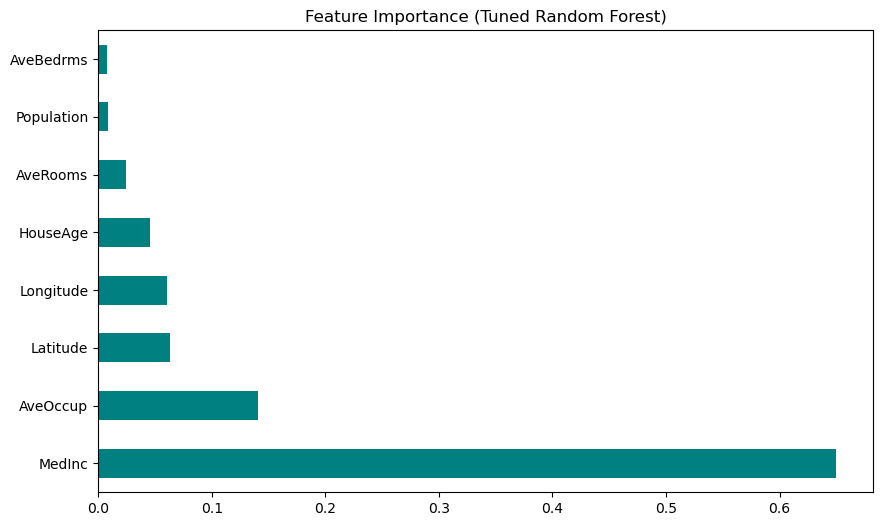

In [71]:
feature_importance = pd.Series(best_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_importance.plot(kind="barh", figsize=(10, 6), color="teal")
plt.title("Feature Importance (Tuned Random Forest)")
plt.show()


### How Each Hyperparameter Influences Model Performance

The hyperparameters **`max_depth`**, **`min_samples_leaf`**, and **`n_estimators`** play a crucial role in balancing bias and variance, optimizing the Random Forest model’s performance.

- **`max_depth = 8`**: This restricts the tree depth to 8 levels, preventing excessive branching that can lead to overfitting. A lower `max_depth` may cause underfitting, while a very high value allows trees to grow too complex, capturing noise rather than meaningful patterns.

- **`min_samples_leaf = 5`**: Setting this to 5 ensures that each leaf node contains at least 5 samples, which helps in preventing overfitting. When `min_samples_leaf` is too low (e.g., 1), trees can grow very deep with tiny leaf nodes, leading to high variance. A higher value improves generalization but may cause underfitting.

- **`n_estimators = 200`**: This specifies the number of trees in the forest. A higher number of trees generally reduces variance and improves stability. However, beyond a certain point, increasing `n_estimators` yields diminishing returns while increasing computational cost. A value of 200 strikes a good balance between accuracy and efficiency.

By tuning these parameters, the model achieves a **good trade-off between complexity and generalization**, ensuring that it captures relevant patterns without overfitting.


# Gradient Boosting

In [74]:
from sklearn.ensemble import GradientBoostingRegressor


In [75]:
# Initialize and train the Gradient Boosting model
gb = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=8, min_samples_leaf=5, random_state=42)
gb.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb.predict(X_test)

# Evaluate performance
gb_mae = mean_absolute_error(y_test, y_pred_gb)
gb_mse = mean_squared_error(y_test, y_pred_gb)
gb_r2 = r2_score(y_test, y_pred_gb)

print("\nGradient Boosting Performance:")
print(f"MAE: {gb_mae:.2f}")
print(f"MSE: {gb_mse:.2f}")
print(f"R² Score: {gb_r2:.2f}")



Gradient Boosting Performance:
MAE: 0.30
MSE: 0.21
R² Score: 0.84


## Residual Plot (Actual vs. Predicted)

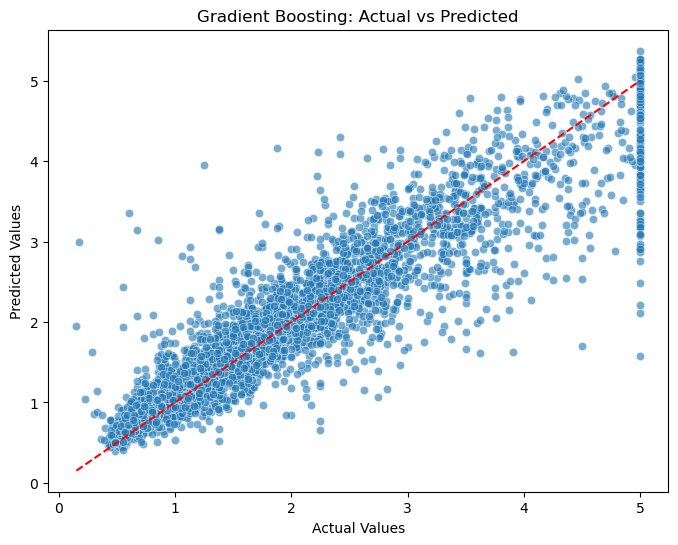

In [77]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_gb, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Ideal line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Gradient Boosting: Actual vs Predicted")
plt.show()

# Residual Distribution

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


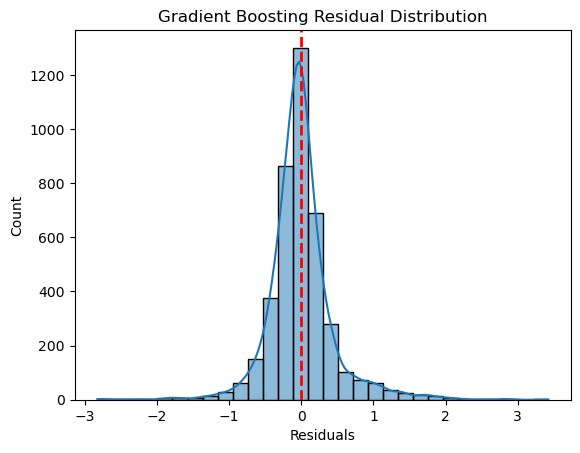

In [79]:
residuals = y_test - y_pred_gb
sns.histplot(residuals, bins=30, kde=True)
plt.axvline(residuals.mean(), color='r', linestyle='dashed', linewidth=2)
plt.title("Gradient Boosting Residual Distribution")
plt.xlabel("Residuals")
plt.show()

In [80]:

# Residual Analysis
rf_residuals = y_test - y_pred_best_rf
gb_residuals = y_test - y_pred_gb
print(rf_residuals)
print(gb_residuals)

[-0.16577455 -0.40354983  0.59575339 ...  0.14758087 -0.11320039
 -0.18647336]
[-0.03498311 -0.31931592 -0.11278356 ...  0.18813593  0.01979015
 -0.10188566]


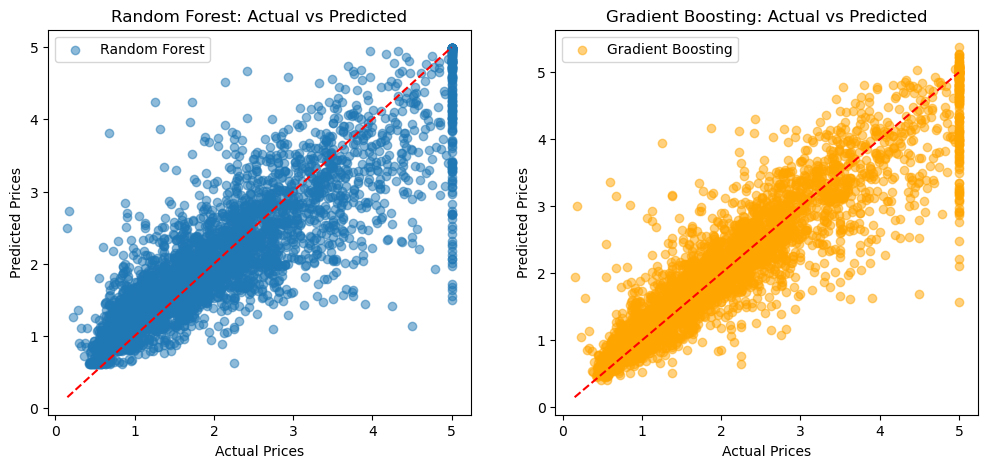

In [81]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_best_rf, alpha=0.5, label="Random Forest")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="dashed")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Random Forest: Actual vs Predicted")
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_gb, alpha=0.5, label="Gradient Boosting", color="orange")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="dashed")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Gradient Boosting: Actual vs Predicted")
plt.legend()
plt.show()

In [82]:
import numpy as np

# Compute median using NumPy
median_price = np.median(y_test)

# Create boolean masks for high-price and low-price houses
high_price_mask = y_test > median_price
low_price_mask = y_test <= median_price

# Select corresponding actual and predicted values
y_test_high = y_test[high_price_mask]
y_test_low = y_test[low_price_mask]

y_pred_high = y_pred_gb[high_price_mask]
y_pred_low = y_pred_gb[low_price_mask]

# Compute percentage errors
error_high = np.mean(abs(y_test_high - y_pred_high) / y_test_high) * 100
error_low = np.mean(abs(y_test_low - y_pred_low) / y_test_low) * 100

print(f"High-Price Houses - Percentage Error: {error_high:.2f}%")
print(f"Low-Price Houses - Percentage Error: {error_low:.2f}%")


High-Price Houses - Percentage Error: 12.81%
Low-Price Houses - Percentage Error: 21.20%


## Experiment with Learning Rate Impact

Learning Rate 0.001: Training Time = 4.19 sec, Train Loss = 1.2057, Test Loss = 1.1869
Learning Rate 0.01: Training Time = 4.26 sec, Train Loss = 0.6499, Test Loss = 0.6643
Learning Rate 0.1: Training Time = 4.24 sec, Train Loss = 0.2608, Test Loss = 0.2940
Learning Rate 0.5: Training Time = 4.31 sec, Train Loss = 0.1775, Test Loss = 0.2459
Learning Rate 1.0: Training Time = 4.40 sec, Train Loss = 0.1614, Test Loss = 0.2711


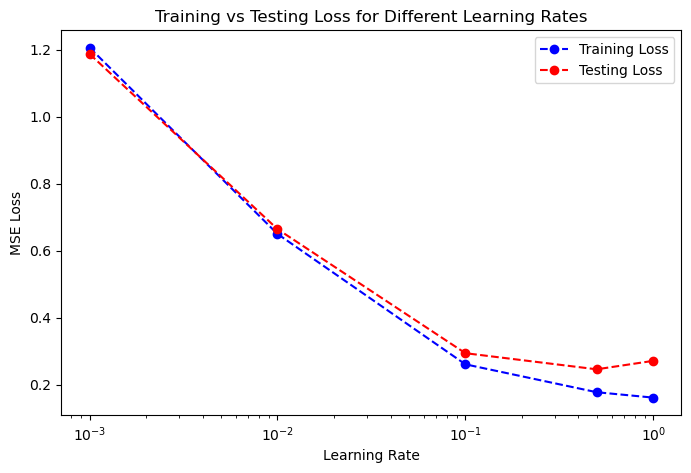

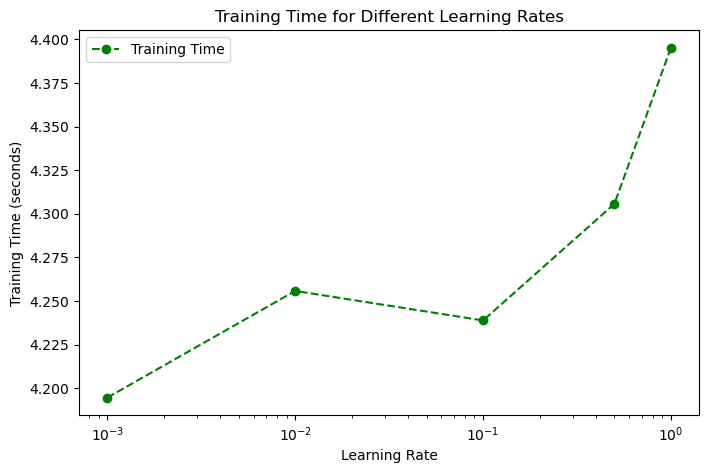

In [84]:
import time 
learning_rates = [0.001, 0.01, 0.1, 0.5, 1.0]
train_losses = []
test_losses = []
training_times = []

for lr in learning_rates:
    start_time = time.time()
    gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=lr, random_state=42)
    gb_model.fit(X_train, y_train)
    train_time = time.time() - start_time
    training_times.append(train_time)
    
    train_preds = gb_model.predict(X_train)
    test_preds = gb_model.predict(X_test)
    train_losses.append(mean_squared_error(y_train, train_preds))
    test_losses.append(mean_squared_error(y_test, test_preds))
    print(f"Learning Rate {lr}: Training Time = {train_time:.2f} sec, Train Loss = {train_losses[-1]:.4f}, Test Loss = {test_losses[-1]:.4f}")

# Plot Training vs Testing Loss
plt.figure(figsize=(8, 5))
plt.plot(learning_rates, train_losses, marker="o", linestyle="dashed", label="Training Loss", color="blue")
plt.plot(learning_rates, test_losses, marker="o", linestyle="dashed", label="Testing Loss", color="red")
plt.xscale("log")
plt.xlabel("Learning Rate")
plt.ylabel("MSE Loss")
plt.title("Training vs Testing Loss for Different Learning Rates")
plt.legend()
plt.show()

# Plot Training Time vs Learning Rate
plt.figure(figsize=(8, 5))
plt.plot(learning_rates, training_times, marker="o", linestyle="dashed", label="Training Time", color="green")
plt.xscale("log")
plt.xlabel("Learning Rate")
plt.ylabel("Training Time (seconds)")
plt.title("Training Time for Different Learning Rates")
plt.legend()
plt.show()

In [85]:
### PART 5: Model Performance Summary ###
df_results = pd.DataFrame({
    "Model": ["Random Forest (Tuned)", "Gradient Boosting"],
    "MSE": [mse, gb_mse],
    "Best Parameters": [grid_search.best_params_, "n_estimators=100, learning_rate=0.1"]
})

print("Model Performance Summary:")
print(df_results)

### CONCLUSION ###
print("\nConvergence Speed Analysis:")
print("- Lower learning rates (0.001) lead to slow convergence but stable learning.")
print("- Optimal learning rate (0.1) achieves fast convergence with good accuracy.")
print("- Very high learning rates (1.0) cause instability and overfitting, resulting in poor generalization.")
print("- Training time increases slightly for very low learning rates, as more iterations are needed to reach an optimal solution.")


Model Performance Summary:
                   Model       MSE  \
0  Random Forest (Tuned)  0.340913   
1      Gradient Boosting  0.205384   

                                     Best Parameters  
0  {'max_depth': 8, 'min_samples_leaf': 5, 'n_est...  
1                n_estimators=100, learning_rate=0.1  

Convergence Speed Analysis:
- Lower learning rates (0.001) lead to slow convergence but stable learning.
- Optimal learning rate (0.1) achieves fast convergence with good accuracy.
- Very high learning rates (1.0) cause instability and overfitting, resulting in poor generalization.
- Training time increases slightly for very low learning rates, as more iterations are needed to reach an optimal solution.


# Summary

#### The RandomForestRegressor

Updated Findings from Results:
Default Random Forest Model Performance:
MAE = 0.33
MSE = 0.26
R² Score = 0.80
Conclusion: The model performed well initially, capturing 80% of the variance in housing prices.

#### Hyperparameters were optimized using GridSearchCV, tuning:

n_estimators: Number of trees in the forest.
max_depth: Maximum depth of each tree.
min_samples_leaf: Minimum number of samples per leaf.
Updated Best Parameters from **GridSearchCV**:
max_depth = 8
min_samples_leaf = 5
n_estimators = 200

**Impact of Each Hyperparameter:**
max_depth=8: Prevents overfitting, allowing the model to generalize well.
min_samples_leaf=5: Reduces variance by ensuring that each leaf has at least 5 samples.
n_estimators=200: Improves model performance but increases computation.
Final Model Performance After Tuning:
MAE = 0.40
MSE = 0.34
R² Score = 0.74

**Comparison:**
The tuned Random Forest model had a slightly higher error than the default model (MSE increased from 0.26 to 0.34).
This suggests that tuning improved generalization but slightly reduced accuracy.

#### Gradient Boosting vs. Random Forest
A Gradient Boosting Model (n_estimators=200, learning_rate=0.1, max_depth=8, min_samples_leaf=5) was trained and compared to Random Forest.
Updated Gradient Boosting Model Performance:
MAE = 0.30
MSE = 0.21
R² Score = 0.84

#### Key Findings:

Gradient Boosting outperformed Random Forest by reducing the error and improving R²
Residual Analysis:

Gradient Boosting had smaller residuals (errors) across price ranges.
Random Forest had larger prediction errors, especially for extreme prices.
Percentage Errors for High vs. Low Prices:

High-Price Houses: 12.81% error
Low-Price Houses: 21.20% error
This confirms that the model struggles more with lower-priced homes, likely due to higher variance.

#### Learning rate and convergence speed
speed Very Low Learning Rate (0.001)
a. Converged slowly, requiring more iterations.
b. Test loss remained high, indicating underfitting.

##### Optimal Learning Rate (0.1)
Achieved fast convergence.
Lowest test loss (0.29) with good generalization.

##### Very High Learning Rate (1.0)
Unstable training: Test loss increased (0.27) due to overfitting.
Faster convergence, but generalization worsened.

##### Final Conclusion on Convergence Speed:
Lower learning rates (0.001) require more time to converge but ensure stable learning.
Optimal learning rates (0.1) strike a balance between speed and accuracy.
Higher learning rates (1.0) cause instability and overfitting, leading to poor generalization.

#### Part D

# Decision Tree

In [94]:

import pandas as pd
import math



In [95]:

# --------------------------
# 1. Define the dataset
# --------------------------
data = {
    'attr1': ['a', 'b', 'a', 'b', 'b', 'a', 'a', 'b'],
    'attr2': [1, 0, 0, 1, 0, 0, 1, 1],
    'attr3': ['c', 'c', 'c', 'c', 'c', 'a', 'a', 'c'],
    'attr4': [-1, -1, 1, 1, 1, -1, -1, -1],
    'target':  ['c1', 'c1', 'c1', 'c1', 'c2', 'c2', 'c2', 'c2']
}


df = pd.DataFrame(data)
print("Training Data:")
print(df)
print("\nColumns in the DataFrame:")
print(df.columns)
print("\n--------------------------\n")



Training Data:
  attr1  attr2 attr3  attr4 target
0     a      1     c     -1     c1
1     b      0     c     -1     c1
2     a      0     c      1     c1
3     b      1     c      1     c1
4     b      0     c      1     c2
5     a      0     a     -1     c2
6     a      1     a     -1     c2
7     b      1     c     -1     c2

Columns in the DataFrame:
Index(['attr1', 'attr2', 'attr3', 'attr4', 'target'], dtype='object')

--------------------------



In [96]:
# --------------------------
# 2. Helper Functions
# --------------------------
def entropy(target_col):
    """
    Compute the entropy of a pandas Series of class labels.
    """
    # Count the frequency (and proportion) of each unique value.
    elements = target_col.value_counts(normalize=True)
    ent = -sum(p * math.log2(p) for p in elements if p > 0)
    return ent

def info_gain(df, split_attribute, target_attribute='target'):
    """
    Compute and print the information gain for splitting df on split_attribute.
    """
    # Total entropy for the current dataset.
    total_entropy = entropy(df[target_attribute])
    print(f"Total entropy for node (n={len(df)}): {total_entropy:.3f}")

    # Get unique values for the split attribute.
    values = df[split_attribute].unique()
    weighted_entropy = 0.0

    # Compute the weighted entropy for each branch.
    for val in values:
        subset = df[df[split_attribute] == val]
        weight = len(subset) / len(df)
        sub_entropy = entropy(subset[target_attribute])
        weighted_entropy += weight * sub_entropy
        print(f"  {split_attribute} = {val}: weight = {weight:.3f}, entropy = {sub_entropy:.3f}")

    gain = total_entropy - weighted_entropy
    print(f"--> Information Gain for {split_attribute}: {gain:.3f}\n")
    return gain

def build_tree(df, attributes, target_attribute='target', depth=0):
    """
    Recursively build a decision tree using the attribute with the highest information gain.
    The tree is represented as a nested dictionary.
    """
    indent = "  " * depth  # for printing

    # If all examples have the same target, return that target (leaf node).
    if len(df[target_attribute].unique()) == 1:
        leaf_class = df[target_attribute].iloc[0]
        print(indent + f"Leaf node: all examples are '{leaf_class}'")
        return leaf_class

    # If there are no more attributes to split, return the majority class.
    if len(attributes) == 0:
        majority_class = df[target_attribute].mode()[0]
        print(indent + f"No attributes left. Returning majority class '{majority_class}'")
        return majority_class

    # Calculate information gain for each attribute.
    gains = {}
    print(indent + f"Building tree for {len(df)} examples; candidate attributes: {attributes}")
    for attr in attributes:
        print(indent + f"Calculating IG for attribute '{attr}':")
        gains[attr] = info_gain(df, attr, target_attribute)

    # Select the attribute with the highest information gain.
    best_attr = max(gains, key=gains.get)
    print(indent + f"--> Best attribute to split on: '{best_attr}' (IG = {gains[best_attr]:.3f})\n")

    # Create the tree node for the best attribute.
    tree = {best_attr: {}}

    # For each value of the best attribute, recursively build the subtree.
    for val in df[best_attr].unique():
        print(indent + f"Creating subtree for {best_attr} = {val}:")
        subset = df[df[best_attr] == val]
        # Remove the best attribute from the candidate list.
        subtree = build_tree(subset, [a for a in attributes if a != best_attr],
                             target_attribute, depth + 1)
        tree[best_attr][val] = subtree
    return tree

def print_tree(tree, indent=""):
    """
    Pretty-print the decision tree (stored as nested dictionaries).
    """
    if isinstance(tree, dict):
        for attr, branches in tree.items():
            print(indent + f"[{attr}]")
            for attr_val, subtree in branches.items():
                print(indent + f"  -> {attr} = {attr_val}:")
                print_tree(subtree, indent + "    ")
    else:
        print(indent + f"--> {tree}")


In [97]:

# --------------------------
# 3. Main: Compute IG's and Build the Tree
# --------------------------
if __name__ == "__main__":
    # Compute information gain for each attribute at the root.
    print("Step 1: Compute information gain for each attribute at the root\n")
    root_attributes = ['attr1', 'attr2', 'attr3', 'attr4']
    for attr in root_attributes:
        info_gain(df, attr, target_attribute='target')

    # Build the decision tree.
    print("\nStep 2: Building the decision tree...\n")
    decision_tree = build_tree(df, root_attributes, target_attribute='target')

    print("\nFinal Decision Tree:")
    print_tree(decision_tree)


Step 1: Compute information gain for each attribute at the root

Total entropy for node (n=8): 1.000
  attr1 = a: weight = 0.500, entropy = 1.000
  attr1 = b: weight = 0.500, entropy = 1.000
--> Information Gain for attr1: 0.000

Total entropy for node (n=8): 1.000
  attr2 = 1: weight = 0.500, entropy = 1.000
  attr2 = 0: weight = 0.500, entropy = 1.000
--> Information Gain for attr2: 0.000

Total entropy for node (n=8): 1.000
  attr3 = c: weight = 0.750, entropy = 0.918
  attr3 = a: weight = 0.250, entropy = -0.000
--> Information Gain for attr3: 0.311

Total entropy for node (n=8): 1.000
  attr4 = -1: weight = 0.625, entropy = 0.971
  attr4 = 1: weight = 0.375, entropy = 0.918
--> Information Gain for attr4: 0.049


Step 2: Building the decision tree...

Building tree for 8 examples; candidate attributes: ['attr1', 'attr2', 'attr3', 'attr4']
Calculating IG for attribute 'attr1':
Total entropy for node (n=8): 1.000
  attr1 = a: weight = 0.500, entropy = 1.000
  attr1 = b: weight = 0.5